## Підготовка даних

Метою цієї роботи є підготовка данихта розвідка даних.
1. Підготовка даних включає в себе зміну типів даних, поділ на нумеричні та категорійні змінні, роботу з NaN. Також на етапу підготовка даних треба дослідити викиди та очистити від викидів датасет.
2. Розвідка даних (EDA) націлена на пошук залежностей між змінними, видалення мультиколінеарних ознак, тощо.

Подібна підготовча робота є обов'язковою бо якість датасета, на якому навчаєтьcя модель, напряму впливає на якість роботи навченої моделі.
Результатом роботи є підготовлений датасет.

### Підготовча робота

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import sklearn.preprocessing as prep
import warnings
import logging
import sklearn.covariance as cov
from scipy.stats import chi2
from itertools import product
import seaborn as sns
import random
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# відключення логерів та попереджень
warnings.filterwarnings('ignore')
logging.getLogger('matplotlib.font_manager').disabled = True
log = logging.getLogger()
log.setLevel(logging.CRITICAL)

pd.set_option('display.max_columns', None)

### Завантаження даних

In [2]:
df = pd.read_csv('train_data.csv')
df.head(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Встановлення індексу таблиці _SK_ID_CURR_

### Вивчення структури даних

In [3]:
df.set_index('SK_ID_CURR', inplace=True)

Перегляд інформації про датасет

In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 100002 to 456255
Data columns (total 121 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    TARGET                        int64  
 1    NAME_CONTRACT_TYPE            object 
 2    CODE_GENDER                   object 
 3    FLAG_OWN_CAR                  object 
 4    FLAG_OWN_REALTY               object 
 5    CNT_CHILDREN                  int64  
 6    AMT_INCOME_TOTAL              float64
 7    AMT_CREDIT                    float64
 8    AMT_ANNUITY                   float64
 9    AMT_GOODS_PRICE               float64
 10   NAME_TYPE_SUITE               object 
 11   NAME_INCOME_TYPE              object 
 12   NAME_EDUCATION_TYPE           object 
 13   NAME_FAMILY_STATUS            object 
 14   NAME_HOUSING_TYPE             object 
 15   REGION_POPULATION_RELATIVE    float64
 16   DAYS_BIRTH                    int64  
 17   DAYS_EMPLOYED                 int64  
 18

In [5]:
print('Дублікати не знайдено' if not any(df.duplicated()) else 'Знайдено дублікати')

Дублікати не знайдено


Пошук стовпчиків з обмеженою кількістю різних значень

In [6]:
# стовпчики з лімітованою кількістю різних даних (<10)
cat_dict = {item: df[item].unique() for item in df if (df[item].nunique() < 10)}
for key in cat_dict.keys():
    print(key, '(', str(df[key].dtype).strip(), ')\t', list(cat_dict[key]))

TARGET ( int64 )	 [1, 0]
NAME_CONTRACT_TYPE ( object )	 ['Cash loans', 'Revolving loans']
CODE_GENDER ( object )	 ['M', 'F', 'XNA']
FLAG_OWN_CAR ( object )	 ['N', 'Y']
FLAG_OWN_REALTY ( object )	 ['Y', 'N']
NAME_TYPE_SUITE ( object )	 ['Unaccompanied', 'Family', 'Spouse, partner', 'Children', 'Other_A', nan, 'Other_B', 'Group of people']
NAME_INCOME_TYPE ( object )	 ['Working', 'State servant', 'Commercial associate', 'Pensioner', 'Unemployed', 'Student', 'Businessman', 'Maternity leave']
NAME_EDUCATION_TYPE ( object )	 ['Secondary / secondary special', 'Higher education', 'Incomplete higher', 'Lower secondary', 'Academic degree']
NAME_FAMILY_STATUS ( object )	 ['Single / not married', 'Married', 'Civil marriage', 'Widow', 'Separated', 'Unknown']
NAME_HOUSING_TYPE ( object )	 ['House / apartment', 'Rented apartment', 'With parents', 'Municipal apartment', 'Office apartment', 'Co-op apartment']
FLAG_MOBIL ( int64 )	 [1, 0]
FLAG_EMP_PHONE ( int64 )	 [1, 0]
FLAG_WORK_PHONE ( int64 )	 [0, 

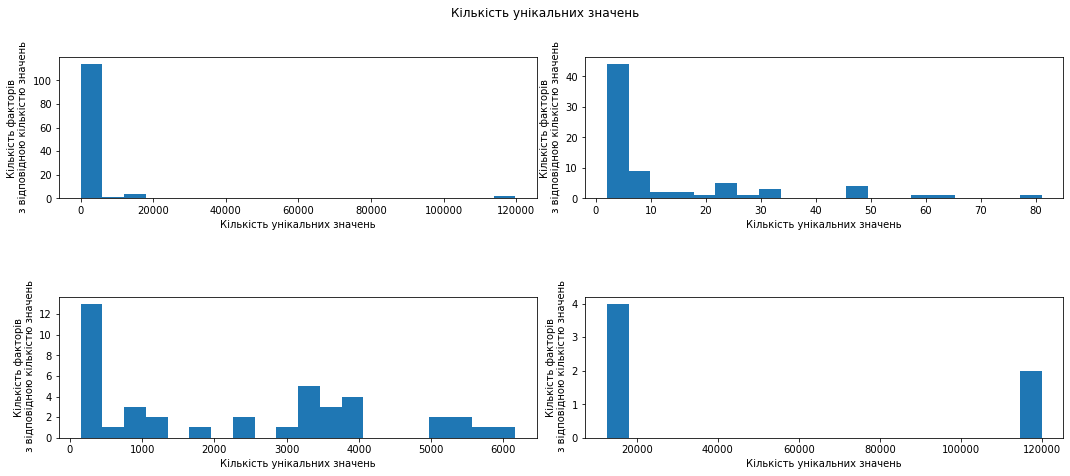

In [7]:
# гістограма кількості унікальних значень в колонках
fig, axs = plt.subplots(2, 2, sharey=False, figsize=(18, 7))
limits = [(0, 1e7), (0, 100), (100, 10000), (10000, 1e7)]

for ax, limit in zip(axs.flatten(), limits):
    nunique = pd.Series([df[col].nunique() for col in df.columns])
    nunique_limit = nunique.loc[(nunique < limit[1]) & (nunique > limit[0])]
    nunique_limit.plot.hist(ax=ax, bins=20)
    ax.set_xlabel('Кількість унікальних значень')
    ax.set_ylabel('Кількість факторів\n з відповідною кількістю значень')
plt.suptitle('Кількість унікальних значень')
plt.subplots_adjust(wspace=0.1, hspace=0.7)
plt.show()

Вивчення стовпчиків з великою кількістю значень

In [8]:
colN = []
for col in df.columns:
    if df[col].nunique() > 10000:
        print('{}: {}'.format(col, df[col].nunique()))
        colN.append(col)

AMT_ANNUITY: 13672
DAYS_BIRTH: 17460
DAYS_EMPLOYED: 12574
DAYS_REGISTRATION: 15688
EXT_SOURCE_1: 114584
EXT_SOURCE_2: 119831


In [9]:
df[colN].head(10)

,AMT_ANNUITY,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,EXT_SOURCE_1,EXT_SOURCE_2
SK_ID_CURR,,,,,,
100002,24700.5,-9461,-637,-3648.0,0.083037,0.262949
100003,35698.5,-16765,-1188,-1186.0,0.311267,0.622246
100004,6750.0,-19046,-225,-4260.0,NaN,0.555912
100006,29686.5,-19005,-3039,-9833.0,NaN,0.650442
100007,21865.5,-19932,-3038,-4311.0,NaN,0.322738
100008,27517.5,-16941,-1588,-4970.0,NaN,0.354225
100009,41301.0,-13778,-3130,-1213.0,0.774761,0.724000
100010,42075.0,-18850,-449,-4597.0,NaN,0.714279
100011,33826.5,-20099,365243,-7427.0,0.587334,0.205747


Перетворення ознак на категорійні

In [10]:
for col in df.columns:
    if df[col].nunique() < 11:
        df[col] = df[col].astype('category')

Пошук ознак (стовпчиків з невизначеним типом)

In [11]:
still_obj = [item for item in df if df[item].dtype == 'object']
still_obj

['OCCUPATION_TYPE', 'ORGANIZATION_TYPE']

Вивчення вмісту знайдених стовпчиків

In [12]:
df['OCCUPATION_TYPE'].unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [13]:
df['ORGANIZATION_TYPE'].unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

Перетворення ознак на категорійні

In [14]:
for col in still_obj:
    df[col] = df[col].astype('category')

In [15]:
[item for item in df if df[item].dtype == 'int64']

['CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'HOUR_APPR_PROCESS_START']

In [16]:
[item for item in df if df[item].dtype == 'float64']

['AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'OWN_CAR_AGE',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_M

In [17]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 100002 to 456255
Columns: 121 entries, TARGET to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: category(56), float64(60), int64(5)
memory usage: 171.3 MB


In [18]:
df.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,HOUR_APPR_PROCESS_START,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307509.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,307510.000000,265992.000000,265992.000000,265992.000000
mean,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,2.152665,12.063419,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.977752,0.755746,0.044595,0.078078,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,1.405292,-962.858788,0.267395,0.265474,1.899974
std,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,11.944812,0.910682,3.265832,0.211062,1.910602e-01,0.194844,0.10824,0.082438,0.059223,0.113280,0.076036,0.134576,0.100049,0.144641,0.161380,0.081184,0.092576,0.110565,0.047732,0.069523,0.107936,0.084307,0.064575,0.110111,0.074445,0.132256,0.100977,0.143709,0.161160,0.081750,0.097880,0.111845,0.046276,0.070254,0.109076,0.082179,0.059897,0.112066,0.076144,0.134467,0.100368,0.145067,0.161934,0.082167,0.093642,0.112260,0.047415,0.070166,0.107462,2.400989,2.379803,826.808487,0.916002,0.794056,1.869295
min,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,1.000000,0.000000,0.014568,8.173617e-08,0.000527,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4292.000000,0.000000,0.000000,0.000000
25%,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.38500

__Перетворення стовпчиків__

_DAYS_BIRTH_

In [19]:
df['AGE'] = (df['DAYS_BIRTH'] * (-1) / 365).apply(int)
df.drop(columns=['DAYS_BIRTH'], inplace=True)

_DAYS_EMPLOYED_

In [20]:
len(df.loc[df.DAYS_EMPLOYED > 0])

55374

In [21]:
df.DAYS_EMPLOYED = df.DAYS_EMPLOYED.apply(lambda x: np.nan if x == 365243 else x)

In [22]:
df['REG'] = df.DAYS_REGISTRATION * (-1) / 365
df.drop(columns=['DAYS_REGISTRATION'], inplace=True)

### Робота з NaN

In [24]:
print('Загальна кількість значень: {}'.format(len(df)))

Загальна кількість значень: 307511


Заміна NaN на "0" в _EXT_SOURCE_1_

In [25]:
cleaned_data = df.copy()
cleaned_data['EXT_SOURCE_1'].fillna(0, inplace=True)

Кількість NaN за кожним признаком

In [27]:
missing = cleaned_data.isna().sum().loc[cleaned_data.isna().sum() > 0].sort_values(ascending=True)
missing

DAYS_LAST_PHONE_CHANGE           1
CNT_FAM_MEMBERS                  2
AMT_ANNUITY                     12
AMT_GOODS_PRICE                278
EXT_SOURCE_2                   660
                             ...  
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_AVG     213514
COMMONAREA_MODE             214865
COMMONAREA_AVG              214865
COMMONAREA_MEDI             214865
Length: 67, dtype: int64

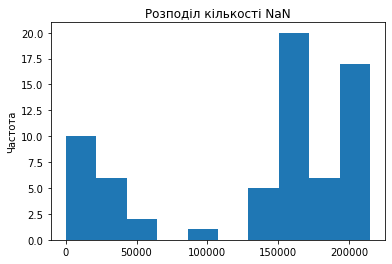

In [28]:
# розподіл кількості NaN
fig, ax = plt.subplots()
missing.plot.hist(ax = ax)
ax.set_title('Розподіл кількості NaN')
ax.set_ylabel('Частота')
plt.show()

<b>Стратегія роботи з NaN</b>  
<li>Видалення факторів з кількістю NaN більше 40% від загальної кількості значень.</li>
<li>Видалення рідків, яки містять NaN в кількості менше, ніж 0.1% від розміру датасету.</li>
<li>Заміняємо NaN на найбільш часте або нульове значення там, де це підходить за смислом.</li>
<li>Використовуємо Imputers для решти факторів.</li>

In [29]:
to_delete = missing.loc[missing > len(df) * 0.4]
cleaned_data = cleaned_data[[item for item in cleaned_data.columns if item not in list(to_delete.index)]]
cleaned_data.isna().sum().loc[cleaned_data.isna().sum() > 0].sort_values(ascending=True)

DAYS_LAST_PHONE_CHANGE            1
CNT_FAM_MEMBERS                   2
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
EXT_SOURCE_2                    660
DEF_60_CNT_SOCIAL_CIRCLE       1021
OBS_60_CNT_SOCIAL_CIRCLE       1021
OBS_30_CNT_SOCIAL_CIRCLE       1021
DEF_30_CNT_SOCIAL_CIRCLE       1021
NAME_TYPE_SUITE                1292
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_HOUR    41519
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
DAYS_EMPLOYED                 55374
EXT_SOURCE_3                  60965
OCCUPATION_TYPE               96391
dtype: int64

In [30]:
del_index = cleaned_data.loc[cleaned_data['DAYS_LAST_PHONE_CHANGE'].isna() | cleaned_data['CNT_FAM_MEMBERS'].isna() |
                             cleaned_data['AMT_ANNUITY'].isna() | cleaned_data['AMT_GOODS_PRICE'].isna() |
                             cleaned_data['EXT_SOURCE_2'].isna() | cleaned_data['DEF_60_CNT_SOCIAL_CIRCLE'].isna() |
                             cleaned_data['OBS_60_CNT_SOCIAL_CIRCLE'].isna() | cleaned_data['DEF_30_CNT_SOCIAL_CIRCLE'].isna() |
                             cleaned_data['OBS_30_CNT_SOCIAL_CIRCLE'].isna() | cleaned_data['NAME_TYPE_SUITE'].isna()].index
cleaned_data['mask'] = False
cleaned_data.loc[list(del_index), 'mask'] = True
cleaned_data = cleaned_data.loc[cleaned_data['mask'] == False].copy()
cleaned_data.drop(columns=['mask'], inplace=True)

In [31]:
cleaned_data.isna().sum().loc[cleaned_data.isna().sum() > 0].sort_values(ascending=True)

AMT_REQ_CREDIT_BUREAU_HOUR    41108
AMT_REQ_CREDIT_BUREAU_DAY     41108
AMT_REQ_CREDIT_BUREAU_WEEK    41108
AMT_REQ_CREDIT_BUREAU_MON     41108
AMT_REQ_CREDIT_BUREAU_QRT     41108
AMT_REQ_CREDIT_BUREAU_YEAR    41108
DAYS_EMPLOYED                 54852
EXT_SOURCE_3                  60251
OCCUPATION_TYPE               95435
dtype: int64

In [32]:
def fillna_try(data):
    try:
        data.fillna(0.0, inplace=True)
    except:
        pass
    try:
        data.fillna(0, inplace=True)
    except:
        pass
    return data

for col in ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 
           'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']:
    cleaned_data[col] = fillna_try(cleaned_data[col])

In [33]:
cleaned_data.isna().sum().loc[cleaned_data.isna().sum() > 0].sort_values(ascending=True)

DAYS_EMPLOYED      54852
EXT_SOURCE_3       60251
OCCUPATION_TYPE    95435
dtype: int64

In [34]:
ext_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']
iterative_data = cleaned_data[ext_features]
imp_mice = IterativeImputer(random_state=0)
imp_mice.fit(iterative_data)
X = imp_mice.transform(iterative_data)
cleaned_data['EXT_SOURCE_3'] = X[:,2]

In [35]:
cleaned_data.isna().sum().loc[cleaned_data.isna().sum() > 0].sort_values(ascending=True)

DAYS_EMPLOYED      54852
OCCUPATION_TYPE    95435
dtype: int64

In [36]:
try:
    cleaned_data['OCCUPATION_TYPE'] = cleaned_data['OCCUPATION_TYPE'].cat.add_categories(['Not defined'])
except:
    pass
    # вже в категоріях
cleaned_data['OCCUPATION_TYPE'].fillna('Not defined', inplace=True)

Розрахунок відсутніх значень (некоректних, занулених) для _DAYS_EMPLOYED_

In [37]:
cleaned_data.corrwith(df['DAYS_EMPLOYED']).apply(np.abs).sort_values(ascending=False)

DAYS_EMPLOYED                 1.000000
AGE                           0.351861
REG                           0.171872
DAYS_LAST_PHONE_CHANGE        0.141702
EXT_SOURCE_3                  0.119375
AMT_GOODS_PRICE               0.093895
EXT_SOURCE_2                  0.093770
AMT_CREDIT                    0.091845
DAYS_ID_PUBLISH               0.089425
CNT_CHILDREN                  0.061422
AMT_ANNUITY                   0.053373
AMT_REQ_CREDIT_BUREAU_MON     0.030776
CNT_FAM_MEMBERS               0.029163
AMT_REQ_CREDIT_BUREAU_YEAR    0.025101
EXT_SOURCE_1                  0.024761
HOUR_APPR_PROCESS_START       0.018093
AMT_INCOME_TOTAL              0.012933
REGION_POPULATION_RELATIVE    0.003964
OBS_60_CNT_SOCIAL_CIRCLE      0.001994
OBS_30_CNT_SOCIAL_CIRCLE      0.001939
AMT_REQ_CREDIT_BUREAU_QRT     0.001816
dtype: float64

In [38]:
X = np.array(cleaned_data[['DAYS_EMPLOYED', 'AGE', 'EXT_SOURCE_1', 'REG']])
imp_mean = IterativeImputer(random_state=0)
cleaned_data['EMPLOYED'] = imp_mean.fit_transform(X)[:,0] * (-1) / 365
cleaned_data.drop(columns=['DAYS_EMPLOYED'], inplace=True)

In [39]:
if len(cleaned_data.isna().sum().loc[cleaned_data.isna().sum() > 0].sort_values(ascending=True)) == 0:
    print('NaN не залишилось')

NaN не залишилось


### Поділ датафрейму на метричні та категорійні змінні

Зміна типів нумеричних ознак

In [41]:
for col in [item for item in cleaned_data if cleaned_data[item].dtype == 'int32']:
    cleaned_data[col] = cleaned_data[col].astype('int64')
cleaned_data.reset_index(inplace=True, drop=True)

Поділ

In [42]:
metric_df = cleaned_data.loc[:,(np.array(cleaned_data.dtypes == "float64")) | (np.array(cleaned_data.dtypes == "int64"))].copy()
non_metric_df = cleaned_data.loc[:,(np.array(cleaned_data.dtypes !="float64")) & (np.array(cleaned_data.dtypes != "int64"))].copy()

Перевірка коректності поділу з _assert_

In [43]:
assert (len(cleaned_data.columns) == len(metric_df.columns) + len(non_metric_df.columns))

### Видалення викидів (метричні змінні)

Нормалізація даних

In [ ]:
data = metric_df.copy()

yj = prep.PowerTransformer(method='yeo-johnson')
qt = prep.QuantileTransformer(n_quantiles=500, output_distribution='normal', random_state=np.random.RandomState(104))

X_trans_yj = yj.fit_transform(data)
X_trans_qt = qt.fit_transform(data)

# Merging
X_trans = np.concatenate((X_trans_yj, X_trans_qt), axis=1)

# Creating DataFrame
merge_labels = list(map(lambda x: "yj_" + x, data.columns.to_list()))+list(map(lambda x: "qt_" + x, data.columns.to_list()))
trans_df = pd.DataFrame(X_trans, columns=merge_labels, index=data.index)

In [ ]:
transqt_df = trans_df.loc[:,[i for i in trans_df.columns.to_list() if "qt" in i]]
transyj_df = trans_df.loc[:,[i for i in trans_df.columns.to_list() if "yj" in i]]

Визначення викидів за міжквартільною відстанню

In [ ]:
def out_iqr(data, k=1.5, return_thresholds=False):
    # розрахунок міжквартільної відстані
    q25, q75 = np.percentile(data, 25, axis=0), np.percentile(data, 75, axis=0)
    iqr = q75 - q25
    
    # розрахунок меж відсічі
    cut_off = iqr * k
    lower, upper = q25 - cut_off, q75 + cut_off
    
    if return_thresholds:
        return lower, upper
    else: # знайдено викиди
        return data.apply(lambda x: np.any((x<lower) | (x>upper)), 1)

outlier_labels = pd.concat([out_iqr(transyj_df, 2.5), out_iqr(transqt_df, 2.5)], axis=1)

Визначення викидів з використанням багатовимірної моделі (базується на одновимірних IQR)

In [ ]:
def out_mahalanobis(data, random, contamination=0.03):
    n = data.shape[0]
    df = data.shape[1]
    # отримання відстані Махаланобіса для кожного спостереження, сортування 
    ee_out = cov.EllipticEnvelope(contamination=0.04, support_fraction=0.95, random_state=np.random.RandomState(304)).fit(data)
    mahalan = ee_out.mahalanobis(data)
    
    # Отримання хі-квадрат для кожного спостереження
    quantiles = chi2.ppf(q=np.fromfunction(lambda x:(x-0.5)/n, (n,)), df=df)
    
    # Отримання міток
    labels = ee_out.predict(data)
    
    return mahalan, quantiles, labels

mqt, qqt, lqt = out_mahalanobis(transqt_df, 0)
myj, qyj, lyj = out_mahalanobis(transyj_df, 0)
lqt_lyj = pd.DataFrame({'lqt': lqt, 'lyj': lyj})

Визначення проценту викидів

In [ ]:
inl = lqt_lyj.loc[(lqt_lyj['lqt'] == 1) & (lqt_lyj['lyj'] == 1)].sum()['lqt']
'Процент викидів: {:4.2f}%'.format(100 - inl/len(lqt_lyj) * 100)

Створення маски для видалення викидів

In [ ]:
lqt_lyj.loc[(lqt_lyj['lqt'] == 1) & (lqt_lyj['lyj'] == 1), 'mask'] = True
lqt_lyj.fillna(False, inplace=True)
lqt_lyj.drop(columns=['lqt', 'lyj'], inplace=True)

In [ ]:
# setting and duplicating mask
cleaned_data = cleaned_data.merge(lqt_lyj, left_index=True, right_index=True)
try:
    cleaned_data = cleaned_data.loc[cleaned_data['mask'] == True].copy()  
except:
    print('Маску не встановлено через помилку')

In [ ]:
# drop columns after outliers' definition in main dataframe (with outliers)
cleaned_data.drop(columns=['mask'], inplace=True)

In [ ]:
# defines number of deleted outliers
rows_after_iqr = len(cleaned_data)
print("Кількість рядків після видалення метричних викидів", rows_after_iqr)
print("Після усіх перетворень видалено {}, рядків, що складає {:.2f}% процентів".format(len(df) - len(cleaned_data), 100 * (len(df) - len(cleaned_data)) / len(df)))

### Видалення викидів (категорійні змінні)

Визначення правил видалення викидів категорійних змінних

In [ ]:
non_metric_df = cleaned_data.loc[:,(np.array(cleaned_data.dtypes !="float64")) & (np.array(cleaned_data.dtypes != "int64"))].copy()

# визначення категорійних викидів
def get_freq(df, item):
    df_g = df.groupby(item).count()
    freq_dict = df_g[list(df_g.columns)[0]].to_dict()
    total = sum(list(freq_dict.values()))
    for key in freq_dict.keys():
        freq_dict[key] /= total
    return freq_dict

def get_cat_outliers(f_dict):
    outliers_coef = 0.01 # мінімально допустима частота значень
    max_value_n = 50 # кількість унікальних значень
    if len(f_dict.keys()) > max_value_n:
        return []
    max_value = max(list(f_dict.values()))
    return [key for key in f_dict.keys() if f_dict[key] < outliers_coef * max_value]    

# створення маски для неметричних викидів
mask_dict = {item: get_cat_outliers(get_freq(non_metric_df, item)) for item in non_metric_df.columns.tolist()}

Застосування створеної маски

In [ ]:
for item in list(non_metric_df.columns):
    non_metric_df[item] = non_metric_df[item].apply(lambda x: x in mask_dict[item])
non_metric_df['summary'] = non_metric_df.eq(True).sum(axis=1)

Видалення викидів

In [ ]:
cleaned_data['mask'] = non_metric_df['summary'].apply(lambda x: x>1)
cleaned_data = cleaned_data.loc[cleaned_data['mask'] == False]
cleaned_data.drop(columns=['mask'], inplace=True)

In [ ]:
print("Кількість рядків після видалення категорійних викидів", len(cleaned_data))
print("Видалено ", rows_after_iqr - len(cleaned_data), ' rows')
print("Після усіх перетворень видалено {}, рядків, що складає {:.2f}% процентів".format(len(df) - len(cleaned_data), 100 * (len(df) - len(cleaned_data)) / len(df)))

In [ ]:
cleaned_data.to_pickle('cleaned_data_1.pkl')

In [ ]:
cleaned_data.info()